This example shows how you can use the Experiment class to execute a set of simulations. 

In [26]:
import defSim as ds
import matplotlib.pyplot as plt
import numpy as np

### The Experiment class

Here, we use the Experiment class to run a bounded confidence model on a grid, varying the communication regime. At each timestep, a randomly drawn agent will send his opinion to one (one-to-one) or all (one-to-many) of its neighbors. The agent who receives the opinion decides to adopt - moving towards the sending agent's opinion - or reject the opinion based on whether their difference is smaller than the confidence level. In the example below, the confidence level is set to 0.25.

All parameters are set to one value, except the communication_regime parameter. This parameter receives a list and automatically converts this list to two conditions. Each condition is run as many times as is passed to the repetitions parameter.

In [2]:
my_experiment = ds.Experiment(seed=314,
                              influence_function="bounded_confidence",
                              attributes_initializer="random_continuous",
                              attribute_parameters={"num_features": 1},
                              dissimilarity_measure="euclidean",
                              topology="grid",
                              network_parameters={'num_agents': 49,
                                                  "neighborhood": "moore"},
                              influence_parameters={"confidence_level": .25},
                              communication_regime=['one-to-one', 'one-to-many'],
                              max_iterations=10000,
                              repetitions=20)

In [3]:
my_results = my_experiment.run(parallel=True)


40 different parameter combinations


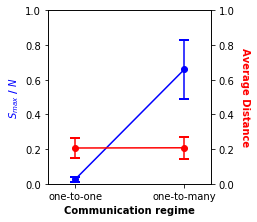

In [91]:
fig, ax1 = plt.subplots(figsize=[3,3])

plt.tight_layout()

x = ['one-to-one', 'one-to-many']
y = [sum(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'Homogeneity']) / 20,
     sum(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'Homogeneity']) / 20]
e = [np.std(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'Homogeneity']),
     np.std(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'Homogeneity'])]

ax1.errorbar(x, y, e,
             marker='o',
             color='b',
             capsize=5,
             capthick=2)
ax1.set_ylim(0, 1)
ax1.set_xlim(-0.25, 1.25)
plt.xlabel('Communication regime', fontweight='bold')
plt.ylabel(r'$S_{max}$ / $N$', fontweight='bold', color='blue')

ax2 = ax1.twinx()
x2 = ['one-to-one', 'one-to-many']
y2 = [sum(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'AverageDistance']) / 20,
     sum(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'AverageDistance']) / 20]
e2 = [np.std(my_results.loc[my_results['communication_regime'] == 'one-to-one', 'AverageDistance']),
     np.std(my_results.loc[my_results['communication_regime'] == 'one-to-many', 'AverageDistance'])]
plt.errorbar(x2, y2, e2,
             marker='o',
             color='r',
             capsize=5,
             capthick=2)
ax2.set_ylim(0, 1)
plt.ylabel('Average Distance', fontweight='bold', color='red', rotation=-90, labelpad=16)

#plt.savefig('/Users/marijnkeijzer/Desktop/lowmodularity.png', dpi=144, bbox_inches='tight')

plt.show()
